In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = boston.data
y = boston.target

#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Getting the R^2 value for the fitted model on Training Set
lr.score(X_train, y_train)*100

77.30135569264233

In [7]:
# Getting the R^2 value for the fitted model on the Test data
lr.score(X_test, y_test)*100

58.92223849182512

In [8]:
from sklearn.linear_model import Ridge


rr = Ridge(alpha=0.01) 
 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score: {}".format(train_score))
print ("linear regression test score: {}".format(test_score))
print ("ridge regression train score low alpha: {}".format(Ridge_train_score))
print ("ridge regression test score low alpha: {}".format( Ridge_test_score))
print ("ridge regression train score high alpha: {}".format(Ridge_train_score100))
print ("ridge regression test score high alpha: {}".format(Ridge_test_score100))

linear regression train score: 0.7730135569264233
linear regression test score: 0.5892223849182512
ridge regression train score low alpha: 0.7730135553534745
ridge regression test score low alpha: 0.589211481504676
ridge regression train score high alpha: 0.7515163225742546
ridge regression test score high alpha: 0.5272685191319559


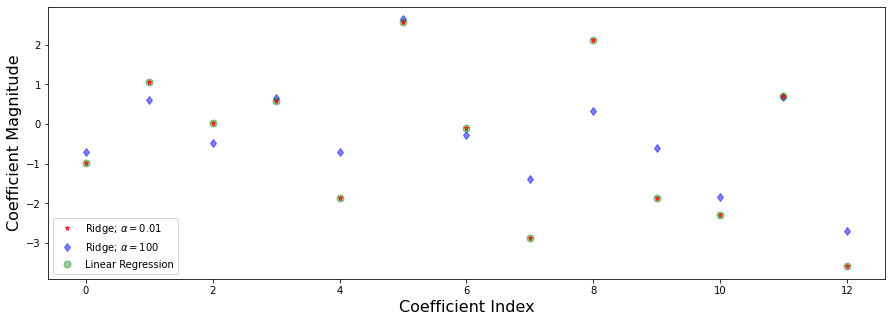

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=3)
plt.show()

In [10]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score: {}".format(train_score)) 
print ("test score: {}".format(test_score))
print ("number of features used: {}".format(coeff_used))

training score: 0.706686443796562
test score: 0.5069663003862216
number of features used: 5


In [11]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score of alpha as 0.01 {}".format(train_score001)) 
print ("test score of alpha as 0.01 {}".format(test_score001))
print ("number of features: of alpha as 0.01 {}\n".format(coeff_used001))

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score of alpha as 0.0001 {}".format(train_score00001)) 
print ("test score of alpha as 0.0001 {}".format(test_score00001))
print ("number of features: of alpha as 0.0001 {}".format(coeff_used00001))

training score of alpha as 0.01 0.7729557113377097
test score of alpha as 0.01 0.5874763161420907
number of features: of alpha as 0.01 12

training score of alpha as 0.0001 0.7730135487086739
test score of alpha as 0.0001 0.5892030552924801
number of features: of alpha as 0.0001 13


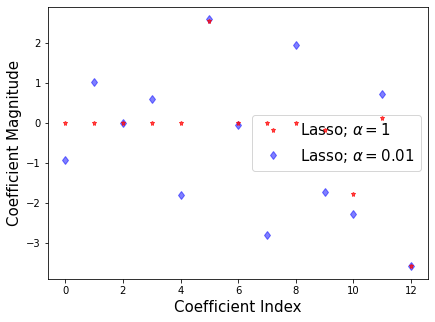

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')

plt.xlabel('Coefficient Index',fontsize=15)
plt.ylabel('Coefficient Magnitude',fontsize=15)
plt.legend(fontsize=15,loc=5)

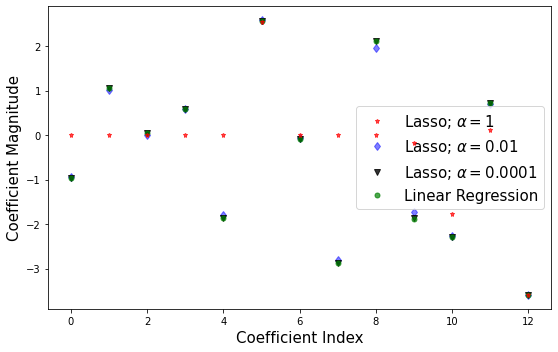

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$')
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=15)
plt.ylabel('Coefficient Magnitude',fontsize=15)
plt.legend(fontsize=15,loc=5)
plt.tight_layout()
plt.show()